In [ ]:
#importing libraries
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import math

In [ ]:
#defining functions
def qp(n): #function for plotting q parameters for different p
  w = 3000
  A = (2*w+2)/(3*w+4)
  B = 2/(3*w+4)
  alpha = B/A
  m =0.9999999976666667
  b = 1+alpha*(1-w*alpha/6)-m
  def f(t, y):
    a,a_dot,p,p_dot = y
    return [
        a_dot,
        a*((-m)/(p*2)*((6+2*w)/(3+2*w))*a**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        #a*((-m)/(p*2)*((6+2*w)/(3+2*w))*an**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        p_dot,
        (1./(2.*w + 3.))*(3.*(m)*a**(-3.) + 6.*b*(2. - n)*p**(n)) - (3./a)*a_dot*p_dot
        #(1./(2.*w + 3.))*(3.*(m)*an**(-3.) + 6.*b*(2. - n)*p**(n)) - 3./a*a_dot*p_dot
         ]
  y0 = [1, 1, 1, alpha]

# Time span to solve over
  t_span = [0, 100]

# Solve the differential equation using solve_ivp
  sol = solve_ivp(f, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100000))


  t=sol.t
  a = sol.y[0]
  adot = sol.y[1]
  p = sol.y[2]
  pdot = sol.y[3]
  H= adot/a
  H2 = (m*a**(-3)/p - pdot*adot*1/(a*p) + w/(6*p**2)*pdot**2 + b*p**(n-1))
  Omega_m = (1/(p*H2))*(m)*a**(-3)
  Om_m = 1/p*(m)*a**(-3)*1/(H**2)
  Om_p = (1/H**2)*(w*pdot**2/(6*p**2)-adot*pdot*1/(a*p)+b*p**(n-1))
  Omega_p = (1/H2)*(w*pdot**2/(6*p**2)-adot*pdot*1/(a*p)+b*p**(n-1))
  wan = Omega_m + Omega_p
  one = Om_p + Om_m
#plt.plot(sol.t, one)
  an= 0.05*a 
  addot = a*((-m)/(p*2)*((6+2*w)/(3+2*w))*a**(-3)+ 1/(a*p)*adot*pdot - w/(3*p**2)*pdot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1))
  q=-(addot*a)/adot**2 
  qn= 0.05*q
  plt.grid()
  plt.xlabel('a')
  plt.ylabel('q')
  plt.plot(an,q, label =n)#*10**(-1))
  plt.legend()

def qv(n):#function for value q parameters for different p
  w = 3000
  A = (2*w+2)/(3*w+4)
  B = 2/(3*w+4)
  alpha = B/A
  m =0.9999999976666667
  b = 1+alpha*(1-w*alpha/6)-m
  def f(t, y):
    a,a_dot,p,p_dot = y
    return [
        a_dot,
        a*((-m)/(p*2)*((6+2*w)/(3+2*w))*a**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        #a*((-m)/(p*2)*((6+2*w)/(3+2*w))*an**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        p_dot,
        (1./(2.*w + 3.))*(3.*(m)*a**(-3.) + 6.*b*(2. - n)*p**(n)) - (3./a)*a_dot*p_dot
        #(1./(2.*w + 3.))*(3.*(m)*an**(-3.) + 6.*b*(2. - n)*p**(n)) - 3./a*a_dot*p_dot
         ]
  y0 = [1, 1, 1, alpha]

# Time span to solve over
  t_span = [0, 100]

# Solve the differential equation using solve_ivp
  sol = solve_ivp(f, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100000))


  t=sol.t
  a = sol.y[0]
  adot = sol.y[1]
  p = sol.y[2]
  pdot = sol.y[3]
  H= adot/a
  H2 = (m*a**(-3)/p - pdot*adot*1/(a*p) + w/(6*p**2)*pdot**2 + b*p**(n-1))
  Omega_m = (1/(p*H2))*(m)*a**(-3)
  Om_m = 1/p*(m)*a**(-3)*1/(H**2)
  Om_p = (1/H**2)*(w*pdot**2/(6*p**2)-adot*pdot*1/(a*p)+b*p**(n-1))
  Omega_p = (1/H2)*(w*pdot**2/(6*p**2)-adot*pdot*1/(a*p)+b*p**(n-1))
  wan = Omega_m + Omega_p
  one = Om_p + Om_m
#plt.plot(sol.t, one)
  an= 0.05*a 
  addot = a*((-m)/(p*2)*((6+2*w)/(3+2*w))*a**(-3)+ 1/(a*p)*adot*pdot - w/(3*p**2)*pdot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1))
  q=-(addot*a)/adot**2 
  qn= 0.05*q
  return q

def qa(n): #function for finding q at z=0 for different p
  w = 3000
  A = (2*w+2)/(3*w+4)
  B = 2/(3*w+4)
  alpha = B/A
  m =0.9999999976666667
  b = 1+alpha*(1-w*alpha/6)-m
  def f(t, y):
    a,a_dot,p,p_dot = y
    return [
        a_dot,
        a*((-m)/(p*2)*((6+2*w)/(3+2*w))*a**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        #a*((-m)/(p*2)*((6+2*w)/(3+2*w))*an**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        p_dot,
        (1./(2.*w + 3.))*(3.*(m)*a**(-3.) + 6.*b*(2. - n)*p**(n)) - (3./a)*a_dot*p_dot
        #(1./(2.*w + 3.))*(3.*(m)*an**(-3.) + 6.*b*(2. - n)*p**(n)) - 3./a*a_dot*p_dot
         ]
  y0 = [1, 1, 1, alpha]

# Time span to solve over
  t_span = [0, 100]

# Solve the differential equation using solve_ivp
  sol = solve_ivp(f, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100000))


  t=sol.t
  a = sol.y[0]
  adot = sol.y[1]
  p = sol.y[2]
  pdot = sol.y[3]
  H= adot/a
  H2 = (m*a**(-3)/p - pdot*adot*1/(a*p) + w/(6*p**2)*pdot**2 + b*p**(n-1))
  Omega_m = (1/(p*H2))*(m)*a**(-3)
  Om_m = 1/p*(m)*a**(-3)*1/(H**2)
  Om_p = (1/H**2)*(w*pdot**2/(6*p**2)-adot*pdot*1/(a*p)+b*p**(n-1))
  Omega_p = (1/H2)*(w*pdot**2/(6*p**2)-adot*pdot*1/(a*p)+b*p**(n-1))
  wan = Omega_m + Omega_p
  one = Om_p + Om_m
#plt.plot(sol.t, one)
  an= 0.05*a 
  addot = a*((-m)/(p*2)*((6+2*w)/(3+2*w))*a**(-3)+ 1/(a*p)*adot*pdot - w/(3*p**2)*pdot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1))
  q=-(addot*a)/adot**2 
  ain = a[46900:47000] #interpolating near
  qin = q[46900:47000]
  interp_func = interp1d(ain, qin) 
  #print("for",n , interp_func(20.0))
  return float(interp_func(20.0))

In [ ]:
qv(-2)
print(0.49975054-0.5)

-0.00024945999999997914


In [ ]:
#calculating the p closest to GR-LambdaCDM model

hm=[]
t = [-3,-2,-1,0,1,2,3,4,5,6]
for i in range(-3,7):
  print("value of q for p =",i , qa(i))
  di = abs(qa(i) - (-0.55))
  hm.append(di)
print(hm)
print(min(hm))
minpos = hm.index(min(hm))
print ("The minimum is at", t[minpos] )

value of q for p = -3 -0.5314408139194707
value of q for p = -2 -0.5324703077003157
value of q for p = -1 -0.5333520697837226
value of q for p = 0 -0.534085640344718
value of q for p = 1 -0.5346707042436197
value of q for p = 2 -0.5351070054119912
value of q for p = 3 -0.5353943471346021
value of q for p = 4 -0.535532590194983
value of q for p = 5 -0.5355217434112785
value of q for p = 6 -0.5353618287396681
[0.01855918608052931, 0.017529692299684374, 0.016647930216277418, 0.015914359655282095, 0.015329295756380312, 0.014892994588008857, 0.014605652865397944, 0.01446740980501704, 0.014478256588721594, 0.014638171260331956]
0.01446740980501704
The minimum is at 4


In [ ]:

r = np.linspace(4, 5, 1000)
q1 = []

for i in r:
    di = abs(qa(i) - (-0.55))
    q1.append(di)

print(q1)
print(min(q1))
minpos = q1.index(min(q1))
print ("The minimum is at", r[minpos] )


[0.01446740980501704, 0.014467346154415472, 0.014467282653261804, 0.014467219301561585, 0.014467156099310152, 0.014467093046511392, 0.01446703014316364, 0.014466967389265672, 0.0144669047848196, 0.014466842329824203, 0.014466780024280812, 0.014466717868188761, 0.014466655861546718, 0.014466594004357902, 0.014466532296620205, 0.014466470738332848, 0.014466409329499386, 0.014466348070116042, 0.014466286960184482, 0.014466225999707483, 0.014466165188678382, 0.014466104527103063, 0.014466044014980195, 0.014465983652309555, 0.014465923439090034, 0.014465863375323962, 0.014465803461008675, 0.014465743696147393, 0.014465684080736452, 0.014465624614780626, 0.014465565298274918, 0.014465506131223882, 0.014465447113623076, 0.014465388245477273, 0.01446532952678381, 0.014465270957542908, 0.014465212537754013, 0.014465154267419122, 0.014465096146537237, 0.014465038175107692, 0.014464980353132262, 0.014464922680607728, 0.014464865157539086, 0.01446480778392556, 0.01446475055976093, 0.01446469348505

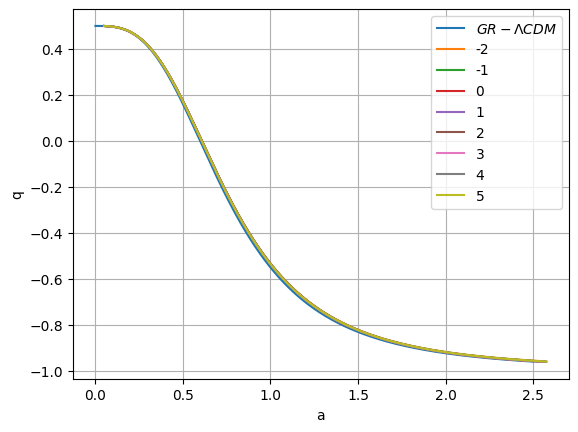

In [ ]:
#plotting the GR-LamdaCDM case and for different values of p

Om_m0 = 0.3
Om_d = 0.7
we=-0.99
ae = np.linspace(0.001,2.5,100000)
Om_m = (Om_m0*ae**(-3))/(Om_m0*ae**(-3) + (1-Om_m0))
Om_d = (Om_d*ae**(-3*(1+we)))/(Om_m0*ae**(-3) + Om_d*ae**(-3*(1+we)))
qe= (1/2)*(Om_m0*ae**(-3)-2*(1-Om_m0))/(Om_m0*ae**(-3) + (1-Om_m0))

plt.plot(ae,qe,label ='$GR- \Lambda CDM$')
plt.xlabel('a')
plt.ylabel('q')
plt.legend()

for i in range(-2,6):
  m=i*10**(-1)
  qp(i)

plt.grid()

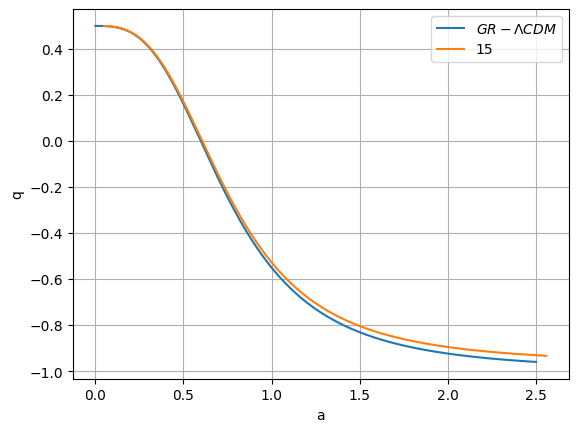

In [ ]:
Om_m0 = 0.3
Om_d = 0.7
we=-0.99
ae = np.linspace(0.001,2.5,100000)
Om_m = (Om_m0*ae**(-3))/(Om_m0*ae**(-3) + (1-Om_m0))
Om_d = (Om_d*ae**(-3*(1+we)))/(Om_m0*ae**(-3) + Om_d*ae**(-3*(1+we)))
qe= (1/2)*(Om_m0*ae**(-3)-2*(1-Om_m0))/(Om_m0*ae**(-3) + (1-Om_m0))

plt.plot(ae,qe,label ='$GR- \Lambda CDM$')
plt.xlabel('a')
plt.ylabel('q')
plt.legend()


qp(15)


In [ ]:
#calculating the closesest q curve to GR-LambdaCDM model
ds= []
r= np.linspace(-3,10,1000)

for i in r:
  d = np.linalg.norm(qv(i) - qe)
  ds.append(d)


In [ ]:
print(min(ds))
minpos = ds.index(min(ds))
print ("The minimum is at", r[minpos] )
print(len(ds))

27.38393882427877
The minimum is at 4.615615615615615
1000


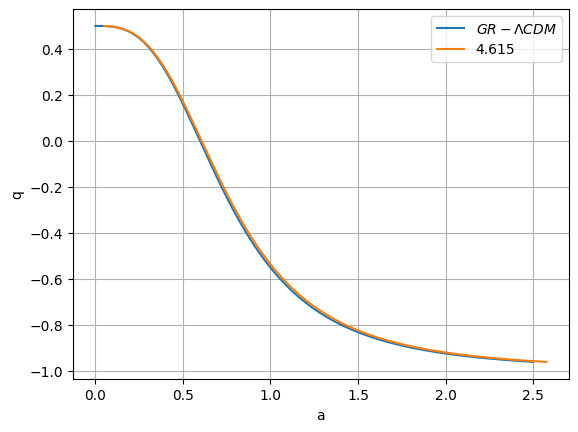

In [ ]:
Om_m0 = 0.3
Om_d = 0.7
we=-0.999
ae = np.linspace(0.001,2.5,100000)
Om_m = (Om_m0*ae**(-3))/(Om_m0*ae**(-3) + (1-Om_m0))
Om_d = (Om_d*ae**(-3*(1+we)))/(Om_m0*ae**(-3) + Om_d*ae**(-3*(1+we)))
qe= (1/2)*(Om_m0*ae**(-3)-2*(1-Om_m0))/(Om_m0*ae**(-3) + (1-Om_m0))

plt.plot(ae,qe,label ='$GR- \Lambda CDM$')
plt.xlabel('a')
plt.ylabel('q')
plt.legend()
qp(4.615)


In [ ]:

print(min(ds))
minpos = ds.index(min(ds))
print ("The minimum is at", r[minpos] )
print(len(ds))

27.383941174414588
The minimum is at 4.604604604604605
1000


In [ ]:
Om_m0 = 0.3
Om_d = 0.7
we=-0.999
ae = np.linspace(0.001,2.5,1000)
Om_m = (Om_m0*ae**(-3))/(Om_m0*ae**(-3) + (1-Om_m0))
Om_d = (Om_d*ae**(-3*(1+we)))/(Om_m0*ae**(-3) + Om_d*ae**(-3*(1+we)))
plt.plot(ae,qe,label ='Einstenian')
plt.xlabel('a')
plt.ylabel('q')
plt.legend()
plt.grid()

#q(2)
q(-2)

In [ ]:

def weff(n): #function for plotting effective equation of state for dark energy
  w = 3000
  A = (2*w+2)/(3*w+4)
  B = 2/(3*w+4)
  alpha = B/A
  m =0.99999999
  b = 1+alpha*(1-w*alpha/6)-m
  def f(t, y):
    a,a_dot,p,p_dot = y
    return [
        a_dot,
        a*((-m)/(p*2)*((6+2*w)/(3+2*w))*a**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        #a*((-m)/(p*2)*((6+2*w)/(3+2*w))*an**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        p_dot,
        (1./(2.*w + 3.))*(3.*(m)*a**(-3.) + 6.*b*(2. - n)*p**(n)) - (3./a)*a_dot*p_dot
        #(1./(2.*w + 3.))*(3.*(m)*an**(-3.) + 6.*b*(2. - n)*p**(n)) - 3./a*a_dot*p_dot
         ]
  y0 = [1, 1, 1, alpha]

# Time span to solve over
  t_span = [0, 100]

# Solve the differential equation using solve_ivp
  sol = solve_ivp(f, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100000))


  t=sol.t
  a = sol.y[0]
  adot = sol.y[1]
  p = sol.y[2]
  pdot = sol.y[3]
  H= adot/a
  H2 = (m*a**(-3)/p - pdot*adot*1/(a*p) + w/(6*p**2)*pdot**2 + b*p**(n-1))
  Omega_m = (1/(p*H2))*(m)*a**(-3)
  Om_m = 1/p*(m)*a**(-3)*1/(H**2)
  Om_p = (1/H**2)*(w*pdot**2/(6*p**2)-adot*pdot*1/(a*p)+b*p**(n-1))
  Omega_p = (1/H2)*(w*pdot**2/(6*p**2)-adot*pdot*1/(a*p)+b*p**(n-1))
  wan = Omega_m + Omega_p
  one = Om_p + Om_m
#plt.plot(sol.t, one)
  an= 0.05*a 
  addot = a*((-m)/(p*2)*((6+2*w)/(3+2*w))*a**(-3)+ 1/(a*p)*adot*pdot - w/(3*p**2)*pdot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1))
  q=-(addot*a)/adot**2 
  p = -(H**2/4)*(1/2-q)
  rho = (3*H**2/8)*(1-(m*a**(-3))/(H**2))
  weff = p/rho
  plt.plot(an ,weff, label = n)
  plt.legend()
  plt.xlabel('a')
  plt.ylabel('w_eff')
  plt.xlim(0.1,2)
  plt.ylim(-3,0)
  ain = a[46900:47000]
  win = weff[46900:47000]
  interp_func = interp1d(ain, win) 
 # print('pressure',p)
  #print('rho',rho)
 # print(q)
 # print(H)
  print("1 + w_de for p= ",n, "is", 1 + interp_func(20.0))


pressure [-9.99625187e-05 -1.00087065e-04 -1.00210871e-04 ... -1.41602092e-04
 -1.41602091e-04 -1.41602091e-04]
rho [3.75000000e-05 3.76868585e-05 3.78727026e-05 ... 1.41604830e-04
 1.41604830e-04 1.41604829e-04]
[ 0.49960015  0.49959845  0.49959675 ... -0.98308975 -0.98309073
 -0.98309171]
[1.         0.99850263 0.99700974 ... 0.01954254 0.01954254 0.01954253]
[ 1.          1.00099976  1.00199902 ... 61.5022351  61.50343704
 61.50463899]
[-2.66566717 -2.65575507 -2.64599207 ... -0.99998066 -0.99998066
 -0.99998066]


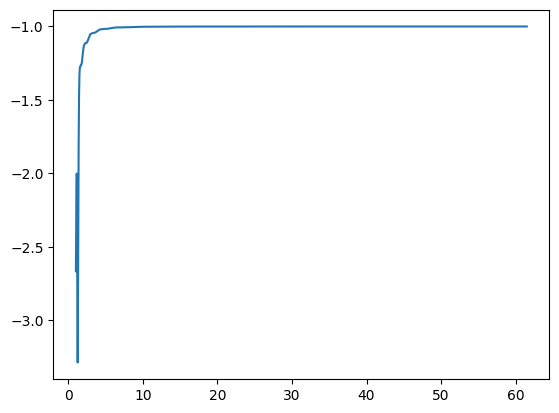

In [ ]:
weff(1)

1 + w_de for p=  -2 is 0.0002604516169371074
1 + w_de for p=  -1 is -0.00010125321005527432
1 + w_de for p=  0 is -0.00036375582541792184
1 + w_de for p=  1 is -0.0005269123962992062
1 + w_de for p=  2 is -0.0005906066612899608
1 + w_de for p=  3 is -0.0005547487211043922
1 + w_de for p=  4 is -0.00041927342959069414
1 + w_de for p=  5 is -0.00018430429545435167


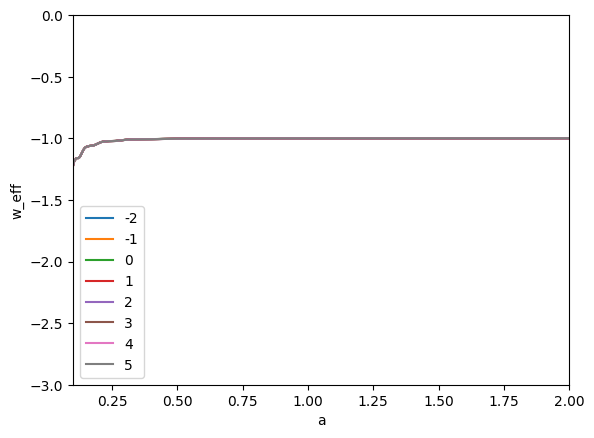

In [ ]:
for i in range(-2,6):
  m=i*10**(-1)
  weff(i)
  

w_eff at a=1 for p=  4.4 -1.0003371802324799


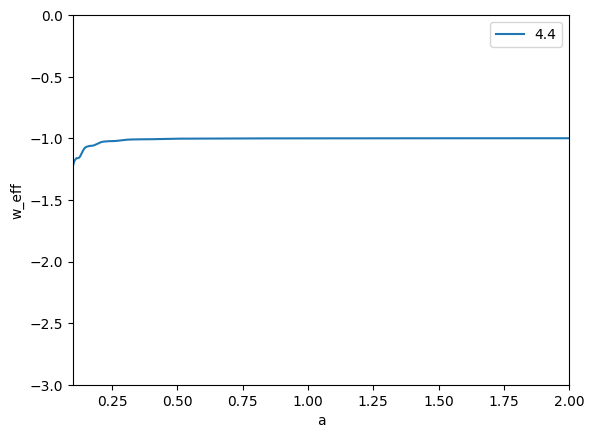

In [ ]:
weff(4.4)